<a href="https://colab.research.google.com/github/amnasyed1/sqlite_database_operations/blob/main/sqlite_database_operations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [142]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlalchemy
from sqlalchemy import create_engine
import sqlite3


## **1. Data Exploration and Analysis**

Basic exploratory analysis using Python, focusing on aspects such as data distribution, missing values, and basic statistics.

### St. Joseph's Hospital

In [15]:
df_stj = pd.read_excel("1013998426_wsnchs-north-inc.-dba-st.-joseph-hospital_standardcharges.xlsx")
df_stj

,Billing/Charge Code,Charge Description,Rev Code,CPT/HCPC,Price,NDC,Package Size,Package Unit,Package Description,Charge Quantity
0,3018437801,"HC 1,5 ANHYDROGLUCITOL,INTERM GLY CNTRL Q10378",301,84378,229.0,NaN,NaN,NaN,NaN,NaN
1,3018263400,HC 11 DEOXYCORTISOL,301,82634,271.0,NaN,NaN,NaN,NaN,NaN
2,3018414300,HC 17 HYDROXPREGNENOLONE,301,84143,177.0,NaN,NaN,NaN,NaN,NaN
3,3018349800,HC 17 HYDROXYPROGESTERONE,301,83498,561.0,NaN,NaN,NaN,NaN,NaN
4,3603621500,HC 1ST ORD SEL CATH ART THORAC,360,36215,908.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
65023,6370000002,XRX ZONISAMIDE 25 MG PO CAPS,250,NaN,316.0,62756-258-02,100.0,each,Bottle,100 each
65024,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,0378-6726-01,100.0,each,Bottle,100 each
65025,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,62756-259-02,100.0,each,Bottle,100 each
65026,6370000002,XRX ZONISAMIDE 50 MG PO CAPS,250,NaN,631.0,68001-243-00,100.0,each,Bottle,100 each


In [16]:
df_stj.head(10)

,Billing/Charge Code,Charge Description,Rev Code,CPT/HCPC,Price,NDC,Package Size,Package Unit,Package Description,Charge Quantity
0,3018437801,"HC 1,5 ANHYDROGLUCITOL,INTERM GLY CNTRL Q10378",301,84378,229.0,NaN,NaN,NaN,NaN,NaN
1,3018263400,HC 11 DEOXYCORTISOL,301,82634,271.0,NaN,NaN,NaN,NaN,NaN
2,3018414300,HC 17 HYDROXPREGNENOLONE,301,84143,177.0,NaN,NaN,NaN,NaN,NaN
3,3018349800,HC 17 HYDROXYPROGESTERONE,301,83498,561.0,NaN,NaN,NaN,NaN,NaN
4,3603621500,HC 1ST ORD SEL CATH ART THORAC,360,36215,908.0,NaN,NaN,NaN,NaN,NaN
5,5120070200,HC 2-D CEPHALOMETRIC IMG CPTR ONLY,512,D0702,143.0,NaN,NaN,NaN,NaN,NaN
6,5120070300,HC 2-D ORAL/FACIAL PHOTO IMG CPTR ONLY,512,D0703,70.0,NaN,NaN,NaN,NaN,NaN
7,3603601400,HC 2ND ORD CATH PL RT LT PUL,360,36014,521.0,NaN,NaN,NaN,NaN,NaN
8,3603624600,HC 2ND ORD SEL CATH ART ABD,360,36246,1017.0,NaN,NaN,NaN,NaN,NaN
9,3603621600,HC 2ND ORD SEL CATH ART THORAC,360,36216,1031.0,NaN,NaN,NaN,NaN,NaN


In [18]:
df_stj.columns

Index(['Billing/Charge Code', 'Charge Description ', 'Rev Code', 'CPT/HCPC',
       'Price', 'NDC', 'Package Size', 'Package Unit', 'Package Description',
       'Charge Quantity'],
      dtype='object')

In [33]:
#column tpyes
df_stj.dtypes

Billing/Charge Code      int64
Charge Description      object
Rev Code                 int64
CPT/HCPC                object
Price                  float64
NDC                     object
Package Size           float64
Package Unit            object
Package Description     object
Charge Quantity         object
dtype: object

In [28]:
df_stj.isnull().sum()

Billing/Charge Code        0
Charge Description         0
Rev Code                   0
CPT/HCPC               14508
Price                     92
NDC                    52316
Package Size           52316
Package Unit           52316
Package Description    52379
Charge Quantity        52316
dtype: int64

##### Missing Values

In [29]:
 # Read excel file with whitespace as missing data
excel_path = "1013998426_wsnchs-north-inc.-dba-st.-joseph-hospital_standardcharges.xlsx"

df_stj = pd.read_excel(excel_path)

print("Original DataFrame:")
print(df_stj)

# Handling whitespace as missing data
df_stj.replace(" ", pd.NA, inplace=True)

print("\nDataFrame with Missing Data Handled:")
print(df_stj)


Original DataFrame:
       Billing/Charge Code                               Charge Description   \
0               3018437801    HC 1,5 ANHYDROGLUCITOL,INTERM GLY CNTRL Q10378   
1               3018263400                               HC 11 DEOXYCORTISOL   
2               3018414300                          HC 17 HYDROXPREGNENOLONE   
3               3018349800                         HC 17 HYDROXYPROGESTERONE   
4               3603621500                    HC 1ST ORD SEL CATH ART THORAC   
...                    ...                                               ...   
65023           6370000002                      XRX ZONISAMIDE 25 MG PO CAPS   
65024           6370000002                      XRX ZONISAMIDE 50 MG PO CAPS   
65025           6370000002                      XRX ZONISAMIDE 50 MG PO CAPS   
65026           6370000002                      XRX ZONISAMIDE 50 MG PO CAPS   
65027           6360000001  XRX ZOSTER VACCINE LIVE 19400 UNT/0.65ML SC SUSR   

       Rev Code CPT

In [31]:
# Dropping values w NaN values
df_stj.dropna(inplace=True)
df_stj

,Billing/Charge Code,Charge Description,Rev Code,CPT/HCPC,Price,NDC,Package Size,Package Unit,Package Description,Charge Quantity
52316,6360000001,XRX (NICU) BEVACIZUMAB INTRAVITREAL INJECTION ...,636,C9257,35.0,99999-006-50,0.025,mL,Syringe,.025 mL
52328,6360000001,XRX ABATACEPT 125 MG/ML SC SOSY,636,J0129,8744.0,0003-2188-11,1.000,mL,Syringe,1 mL
52329,6360000001,XRX ABATACEPT 250 MG IV SOLR,636,J0129,8984.0,0003-2187-13,1.000,each,Vial,1 each
52330,6360000001,XRX ABCIXIMAB 2 MG/ML IV SOLN,636,J0130,9303.0,57894-200-01,5.000,mL,Vial,5 mL
52331,6360349002,XRX ABEMACICLIB 100 MG PO TABS,636,C9399,23764.0,0002-4815-54,14.000,each,Box,14 each
...,...,...,...,...,...,...,...,...,...,...
65002,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,1622.0,67457-619-10,100.000,mL,Vial,100 mL
65003,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,2070.0,55111-688-52,100.000,mL,Bottle,100 mL
65004,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,2415.0,25021-830-82,100.000,mL,Flex Cont,100 mL
65005,6360000001,XRX ZOLEDRONIC ACID 5 MG/100ML IV SOLN,636,J3489,5717.0,23155-186-31,100.000,mL,Bottle,100 mL


##### Basic Statistics

In [35]:
df_stj.columns

Index(['Billing/Charge Code', 'Charge Description ', 'Rev Code', 'CPT/HCPC',
       'Price', 'NDC', 'Package Size', 'Package Unit', 'Package Description',
       'Charge Quantity'],
      dtype='object')

In [40]:
df_stj['Package Description'].value_counts()

Vial          2500
Flex Cont      519
Syringe        364
Bottle         208
Bag            159
Ampule         125
Box             91
Blister         60
Glass Cont      47
Plas Cont       33
Cartridge        8
Pen              7
Crtrdg-NDL       5
Disp Pack        4
Cup              4
Pump Btl         4
Tube             1
Package          1
Name: Package Description, dtype: int64

In [36]:
df_stj['Price'].value_counts()

21.0       84
35.0       55
18.0       54
42.0       51
29.0       47
           ..
3039.0      1
859.0       1
11551.0     1
9315.0      1
1540.0      1
Name: Price, Length: 1183, dtype: int64

In [39]:
df_stj['Package Unit'].value_counts()

mL       3095
each     1023
Units      15
mcg         3
mg          2
g           1
vial        1
Name: Package Unit, dtype: int64

In [105]:
df_stj['Charge Description '].value_counts()

XRX FENTANYL CITRATE 50 MCG/ML IJ SOLN (WRAPPER)     33
XRX FUROSEMIDE 10 MG/ML IJ SOLN                      33
XRX SODIUM CHLORIDE 0.9 % IV SOLN                    32
XRX HEPARIN SODIUM (PORCINE) 1000 UNIT/ML IJ SOLN    23
XRX DOXORUBICIN HCL 2 MG/ML IV SOLN                  23
                                                     ..
XRX GLUCARPIDASE 1000 UNITS IV SOLR                   1
XRX GLYCOPYRROLATE 1 MG/5ML IJ SOLN                   1
XRX GLYCOPYRROLATE 1 MG/5ML IV SOSY                   1
XRX GLYCOPYRROLATE PF 0.2 MG/ML IJ SOLN               1
XRX ZOSTER VACCINE LIVE 19400 UNT/0.65ML SC SUSR      1
Name: Charge Description , Length: 1386, dtype: int64

In [34]:
df_stj.describe()

,Billing/Charge Code,Rev Code,Price,Package Size
count,4.140000e+03,4140.000000,4140.000000,4140.000000
mean,6.195973e+09,618.588406,3624.753382,62.376016
std,7.610532e+08,78.393366,18289.269447,183.825265
min,2.500000e+09,250.000000,1.000000,0.025000
25%,6.360000e+09,636.000000,38.000000,1.000000
50%,6.360000e+09,636.000000,133.000000,5.000000
75%,6.360000e+09,636.000000,781.750000,50.000000
max,6.370000e+09,636.000000,431958.000000,5000.000000


##### Data Distribution

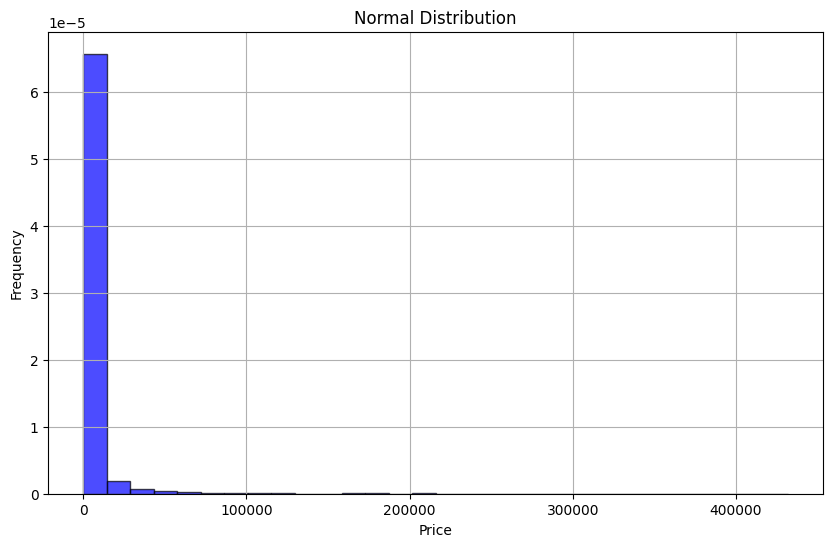

In [55]:
# Histogram, used for numeric values and columns like 'Price'
plt.figure(figsize=(10, 6))
plt.hist(df_stj['Price'], bins=30, density=True, alpha=0.7, color='blue',edgecolor='black')
plt.title('Normal Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

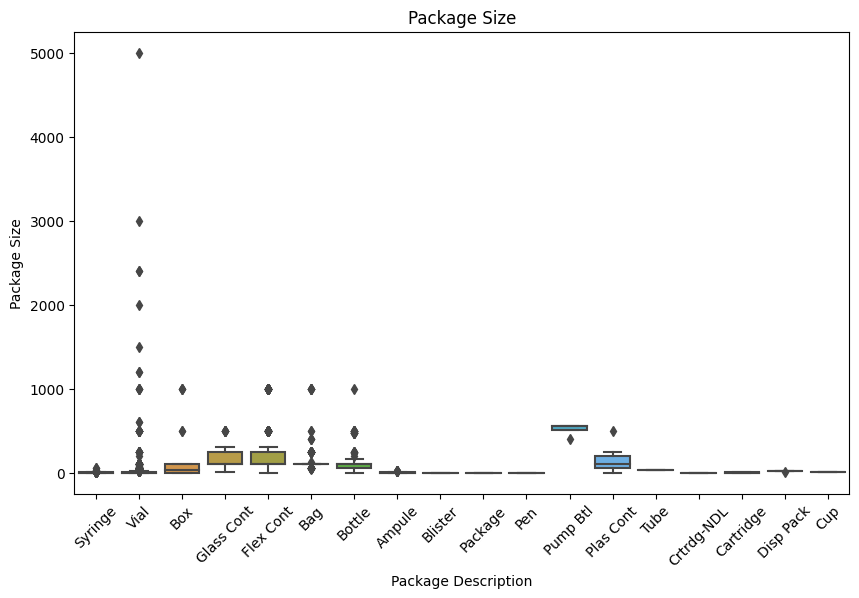

In [56]:
#  Box plot for Package Size and Package Description
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_stj, x='Package Description', y='Package Size')
plt.title('Package Size')
plt.xlabel('Package Description')
plt.ylabel('Package Size')
plt.xticks(rotation=45)
plt.show()

### Stony Brook Hospital

In [60]:
df_sb =pd.read_csv("https://raw.githubusercontent.com/amnasyed1/sqlite_database_operations/main/data/stonybrook.csv")
df_sb

,Code,Description,Type,Package/Line_Level,Gross charge,Discounted cash price,De-identified min contracted rate,De-identified max contracted rate,Derived contracted rate,1199-Commercial other,...,Optum-Commercial other,Oxford-Commercial other,Oxford-Commercial HMO/POS,Tricare-Commercial other,United Healthcare-Commercial other,United Healthcare-Medicare Advantage HMO,United Healthcare-Commercial HMO/POS,United Healthcare-Medicaid HMO,United Healthcare-Commercial PPO/Open Access,Veteran Family-Commercial other
0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,2155.50,2155.50,2155.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,58.55,1761.25,909.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,446.28,6017.59,4219.31,4592.0,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7705,30981203,R&B SICU 09W1 ICR PT-Z,NaN,NaN,12090.00,12090.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7706,30993018,R&B TICR 09W2 - PT-I,NaN,NaN,13590.00,13590.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7707,33500000,R&B REV PICU 11S2 PT-X,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7708,30333058,ROPH HOSP.OBSERVATION PT-T,NaN,NaN,8165.00,8165.00,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
df_sb.head(10)

,Code,Description,Type,Package/Line_Level,Gross charge,Discounted cash price,De-identified min contracted rate,De-identified max contracted rate,Derived contracted rate,1199-Commercial other,...,Optum-Commercial other,Oxford-Commercial other,Oxford-Commercial HMO/POS,Tricare-Commercial other,United Healthcare-Commercial other,United Healthcare-Medicare Advantage HMO,United Healthcare-Commercial HMO/POS,United Healthcare-Medicaid HMO,United Healthcare-Commercial PPO/Open Access,Veteran Family-Commercial other
0,10004,"FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...",Outpatient,Line,718.67,718.67,2155.50,2155.50,2155.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
2,10005,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Package,2061.25,2061.25,87.02,4782.00,2308.44,2411.0,...,NaN,4782.0,NaN,NaN,3845.25,NaN,NaN,658.94,NaN,NaN
3,10006,FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...,Outpatient,Line,728.54,728.54,58.55,1761.25,909.90,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,2823.01,2823.01,446.28,6017.59,4219.31,4592.0,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
5,10009,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Package,2823.01,2823.01,446.28,6017.59,4219.31,4592.0,...,NaN,NaN,NaN,NaN,5127.00,NaN,NaN,NaN,NaN,NaN
6,10010,FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...,Outpatient,Line,588.00,588.00,2155.50,2155.50,2155.50,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,10021,"FINE NEEDLE ASPIRATION BIOPSY, FIRST GROWTH",Outpatient,Line,1566.78,1566.78,275.46,2265.50,1270.48,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,10021,"FINE NEEDLE ASPIRATION BIOPSY, FIRST GROWTH",Outpatient,Package,1566.78,1566.78,275.46,2265.50,1270.48,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,10030,DRAINAGE OF FLUID COLLECTION IN SOFT TISSUE US...,Outpatient,Line,2082.05,2082.05,152.66,4101.00,1663.85,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [62]:
df_sb.columns

Index(['Code', 'Description', 'Type', 'Package/Line_Level', 'Gross charge',
       'Discounted cash price', 'De-identified min contracted rate',
       'De-identified max contracted rate', 'Derived contracted rate',
       '1199-Commercial other', 'Aetna-Medicare Advantage HMO',
       'Aetna-Commercial HMO/POS', 'Aetna-Commercial PPO/Open Access',
       'Aetna-Commercial other', 'Empire Health-Commercial other',
       'Empire Health-Commercial PPO/Open Access',
       'BlueCross BlueShield-Commercial other',
       'Beacon Health-Commercial other', 'Carelon Health-Commercial other',
       'Cigna-Commercial PPO/Open Access', 'Cigna-Commercial other',
       'Cigna-Commercial HMO/POS', 'EH Facet-Commercial other',
       'EmblemHealth-Commercial PPO/Open Access',
       'EmblemHealth-Commercial other', 'EmblemHealth-Commercial HMO/POS',
       'EmblemHealth-Medicaid HMO', 'EmblemHealth-Medicare Advantage HMO',
       'Empire Health-Commercial HMO/POS',
       'Empire Health-Medicare 

In [63]:
df_sb.dtypes

Code                                             object
Description                                      object
Type                                             object
Package/Line_Level                               object
Gross charge                                    float64
Discounted cash price                           float64
De-identified min contracted rate               float64
De-identified max contracted rate               float64
Derived contracted rate                         float64
1199-Commercial other                           float64
Aetna-Medicare Advantage HMO                    float64
Aetna-Commercial HMO/POS                        float64
Aetna-Commercial PPO/Open Access                float64
Aetna-Commercial other                          float64
Empire Health-Commercial other                  float64
Empire Health-Commercial PPO/Open Access        float64
BlueCross BlueShield-Commercial other           float64
Beacon Health-Commercial other                  

In [65]:
df_sb.isnull().sum()

Code                                               0
Description                                        0
Type                                             783
Package/Line_Level                               783
Gross charge                                       0
Discounted cash price                              0
De-identified min contracted rate               1456
De-identified max contracted rate               1456
Derived contracted rate                         1456
1199-Commercial other                           6696
Aetna-Medicare Advantage HMO                    6604
Aetna-Commercial HMO/POS                        5883
Aetna-Commercial PPO/Open Access                6098
Aetna-Commercial other                          7582
Empire Health-Commercial other                  4650
Empire Health-Commercial PPO/Open Access        5308
BlueCross BlueShield-Commercial other           6456
Beacon Health-Commercial other                  7707
Carelon Health-Commercial other               

In [80]:
 # Read csv file with whitespace as missing data
csv_path = "https://raw.githubusercontent.com/amnasyed1/sqlite_database_operations/main/data/stonybrook.csv"
df_sb = pd.read_csv(csv_path)

print("Original DataFrame:")
print(df_sb)

# Handling whitespace as missing data
df_sb.replace(" ", pd.NA, inplace=True)

print("\nDataFrame with Missing Data Handled:")
print(df_sb)


Original DataFrame:
          Code                                        Description        Type  \
0        10004  FINE NEEDLE ASPIRATION BIOPSY, EACH ADDITIONAL...  Outpatient   
1        10005  FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...  Outpatient   
2        10005  FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...  Outpatient   
3        10006  FINE NEEDLE ASPIRATION BIOPSY USING ULTRASOUND...  Outpatient   
4        10009  FINE NEEDLE ASPIRATION BIOPSY OF GROWTH USING ...  Outpatient   
...        ...                                                ...         ...   
7705  30981203                             R&B SICU 09W1 ICR PT-Z         NaN   
7706  30993018                               R&B TICR 09W2 - PT-I         NaN   
7707  33500000                             R&B REV PICU 11S2 PT-X         NaN   
7708  30333058                         ROPH HOSP.OBSERVATION PT-T         NaN   
7709  30000004                                       SEMI-PRIVATE         NaN   

     Pa

#### Basic Statistics

In [83]:
df_sb.columns

Index(['Code', 'Description', 'Type', 'Package/Line_Level', 'Gross charge',
       'Discounted cash price', 'De-identified min contracted rate',
       'De-identified max contracted rate', 'Derived contracted rate',
       '1199-Commercial other', 'Aetna-Medicare Advantage HMO',
       'Aetna-Commercial HMO/POS', 'Aetna-Commercial PPO/Open Access',
       'Aetna-Commercial other', 'Empire Health-Commercial other',
       'Empire Health-Commercial PPO/Open Access',
       'BlueCross BlueShield-Commercial other',
       'Beacon Health-Commercial other', 'Carelon Health-Commercial other',
       'Cigna-Commercial PPO/Open Access', 'Cigna-Commercial other',
       'Cigna-Commercial HMO/POS', 'EH Facet-Commercial other',
       'EmblemHealth-Commercial PPO/Open Access',
       'EmblemHealth-Commercial other', 'EmblemHealth-Commercial HMO/POS',
       'EmblemHealth-Medicaid HMO', 'EmblemHealth-Medicare Advantage HMO',
       'Empire Health-Commercial HMO/POS',
       'Empire Health-Medicare 

In [84]:
df_sb['Gross charge'].value_counts()

8165.00     268
12090.00     70
13590.00     63
8965.00      47
513.00       13
           ... 
6453.95       1
3727.11       1
2284.63       1
18455.69      1
4580.00       1
Name: Gross charge, Length: 5871, dtype: int64

In [85]:
df_sb['Type'].value_counts()

Outpatient    6041
Inpatient      886
Name: Type, dtype: int64

In [86]:
df_sb['Description'].value_counts()

R&B MED 05CA SEMI-PRIVATE/2                                                                   3
R&B SHA 05PS/11PS SEMI-PRIVATE                                                                3
DESTRUCTION OF FIRST DIVISION OF FACE NERVE BRANCH                                            2
INJECTION OF CHEMICAL FOR PARALYSIS OF SALIVARY GLANDS ON BOTH SIDES OF MOUTH                 2
INJECTION OF CHEMICAL FOR PARALYSIS OF FACIAL AND NECK NERVE MUSCLES ON BOTH SIDES OF FACE    2
                                                                                             ..
ANCHOR/SCREW FOR OPPOSING BONE-TO-BONE OR SOFT TISSUE-TO-BONE (IMPLANTABLE)                   1
BRACHYTHERAPY NEEDLE                                                                          1
CARDIOVERTER-DEFIBRILLATOR, DUAL CHAMBER (IMPLANTABLE)                                        1
CARDIOVERTER-DEFIBRILLATOR, SINGLE CHAMBER (IMPLANTABLE)                                      1
SEMI-PRIVATE                            

In [88]:
df_sb.describe()

,Gross charge,Discounted cash price,De-identified min contracted rate,De-identified max contracted rate,Derived contracted rate,1199-Commercial other,Aetna-Medicare Advantage HMO,Aetna-Commercial HMO/POS,Aetna-Commercial PPO/Open Access,Aetna-Commercial other,...,Optum-Commercial other,Oxford-Commercial other,Oxford-Commercial HMO/POS,Tricare-Commercial other,United Healthcare-Commercial other,United Healthcare-Medicare Advantage HMO,United Healthcare-Commercial HMO/POS,United Healthcare-Medicaid HMO,United Healthcare-Commercial PPO/Open Access,Veteran Family-Commercial other
count,7.710000e+03,7.710000e+03,6254.000000,6.254000e+03,6254.000000,1014.000000,1106.000000,1827.000000,1612.000000,128.000000,...,943.000000,1777.000000,0.0,434.000000,2357.000000,624.000000,133.000000,2065.000000,357.000000,46.000000
mean,2.274832e+04,2.274832e+04,4090.693876,1.003579e+04,6315.587725,5791.542456,5614.005027,4320.418248,4436.188381,1703.756250,...,10868.205705,2572.653849,NaN,2070.212120,5977.464298,4438.776234,3261.594586,2454.314228,789.416667,702.261087
std,7.470570e+04,7.470570e+04,10576.213503,2.915075e+04,14601.846406,24302.352403,12671.487487,8718.537182,8881.733882,5124.232802,...,20703.429246,4036.667401,NaN,8501.228677,16227.981498,9982.579323,10266.478193,11009.140577,2880.486830,1717.006016
min,3.000000e-02,3.000000e-02,0.010000,1.000000e-01,0.030000,0.010000,1.100000,0.020000,0.500000,0.590000,...,2.370000,0.010000,NaN,1.000000,0.010000,1.330000,0.190000,0.010000,0.180000,2.480000
25%,1.065895e+03,1.065895e+03,96.520000,6.982500e+02,403.117500,148.797500,125.070000,277.900000,312.750000,110.387500,...,200.450000,197.880000,NaN,71.220000,258.500000,96.290000,129.000000,42.980000,8.400000,26.810000
50%,4.745295e+03,4.745295e+03,1108.860000,4.311000e+03,2600.740000,974.400000,714.860000,2153.000000,2153.000000,404.500000,...,1700.200000,1932.380000,NaN,236.230000,1571.000000,387.500000,444.000000,425.790000,34.830000,82.710000
75%,1.103881e+04,1.103881e+04,4309.532500,8.170000e+03,5870.540000,4592.000000,5782.430000,4822.000000,4822.000000,1778.920000,...,13359.895000,4704.000000,NaN,1486.947500,5127.000000,3531.920000,2257.430000,1753.100000,286.800000,235.000000
max,1.857952e+06,1.857952e+06,327869.690000,1.302636e+06,370099.900000,331304.280000,157848.600000,99999.990000,96372.570000,54838.130000,...,277267.380000,80891.260000,NaN,154940.610000,291490.750000,92493.910000,88051.340000,327869.690000,26350.000000,7195.400000


#### Data Distribution

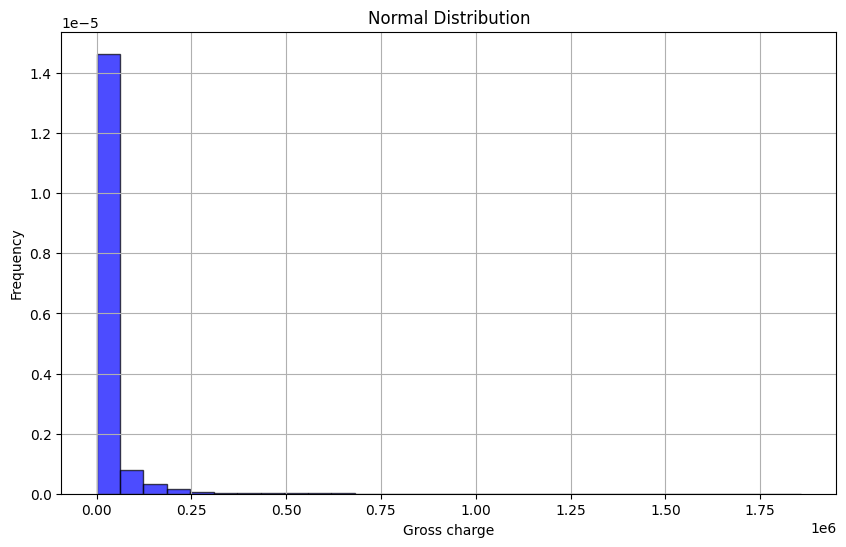

In [98]:
# Histogram, used for numeric values and columns like 'Gross charge'
plt.figure(figsize=(10, 6))
plt.hist(df_sb['Gross charge'], bins=30, density=True, alpha=0.7, color='blue',edgecolor='black')
plt.title('Normal Distribution')
plt.xlabel('Gross charge')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

### Insights and Observations
- It was very interesting to see the differences in prices between Stony Brook and St. Joseph. Stony Brook's services were significantly more expensive.

## **2. SQLite Database Operations**

In [183]:
# Creating a local SQLite database
conn = sqlite3.connect('health.db')
c = conn.cursor()

In [128]:
c.execute("""
            CREATE TABLE stonybrook_system
                (
                    hospital_name text,
                    insurance_type text,
                    code text,
                    code_description text,
                    cost_negotiated real,
                    cost_minimum real,
                    cost_maximum real
                );
          """)

conn.commit()

In [129]:
c.execute('''
  SELECT name
  FROM sqlite_master
  WHERE type='table';
  ''')

c.fetchall()


[('data',), ('sbsystemdata',), ('stonybrook_system',)]

In [131]:
c.execute('''
  SELECT * FROM stonybrook_system;
''')

print(c.fetchall())

[]


In [184]:
sql_query = """

INSERT INTO stonybrook_system (
  'hospital_name',
  'insurance_type',
  'code',
  'code_description',
  'cost_negotiated',
  'cost_minimum',
  'cost_maximum'
  )
  values (
    'eastern long island hospital',
    'united healthcare',
    '99214',
    'outpatient visit',
    150.00,
    1.00,
    1500.00
  );

"""

print(sql_query)
c.execute(sql_query)
conn.commit()



INSERT INTO stonybrook_system (
  'hospital_name',
  'insurance_type',
  'code',
  'code_description',
  'cost_negotiated',
  'cost_minimum',
  'cost_maximum'
  )
  values (
    'eastern long island hospital',
    'united healthcare',
    '99214',
    'outpatient visit',
    150.00,
    1.00,
    1500.00
  );




In [185]:
#checking if the row has been inserted using sqlite
sql_query_2 = """
select *
from stonybrook_system;
"""

c.execute(sql_query_2)
print(c.fetchall())

[('eastern long island hospital', 'united healthcare', '99214', 'outpatient visit', 150.0, 1.0, 1500.0), ('eastern long island hospital', 'united healthcare', '99214', 'outpatient visit', 150.0, 1.0, 1500.0)]


In [180]:
conn.close()

In [187]:
# ## create engine to connect to the sqlite DB
engine = create_engine('sqlite:///health.db')

In [190]:
# checking by using pandas so it can return the response as a df
pd.read_sql_query("select * from stonybrook_system;", conn)


,hospital_name,insurance_type,code,code_description,cost_negotiated,cost_minimum,cost_maximum
0,eastern long island hospital,united healthcare,99214,outpatient visit,150.0,1.0,1500.0
1,eastern long island hospital,united healthcare,99214,outpatient visit,150.0,1.0,1500.0
